**Analiza povprečnih plač v Sloveniji (2008–2022)**

Ta Jupyter Notebook analizira podatke o povprečnih plačah v Sloveniji na podlagi različnih dejavnikov, kot so regija, starost in spol. Podatke smo pridobili iz OPSI (Odprti podatki Slovenije).

**Podatkovni sklop vsebuje:**
- Regije (12 regij Slovenije)
- Starostne skupine (npr. 15–24, 25–34, ...)
- Spol (moški, ženske)
- Leto (2008–2022)
- Povprečno mesečno plačo

**Cilji analize:**
1. Kako so se povprečne plače spreminjale skozi leta?
2. Kakšne so razlike v plačah med spoloma v različnih regijah?
3. Kako močno starost vpliva na plačo v posamezni regiji?

**Uvoz modulov, branje podatkov iz .px datoteke: in osnovni pregled CSV datoteke:**

V tem delu smo najprej namestili in uvozili knjižnico pyaxis, ki omogoča branje .px datotek, ter knjižnico pandas za delo s tabelarčnimi podatki. Nato smo določili pot do datoteke in prebrali podatke v DataFrame. Na koncu smo podatke shranili v CSV datoteko z ustreznim kodiranjem, da bodo združljivi z orodji, kot je Excel.

Uvozili smo podatke iz ustvarjene CSV datoteke z uporabo pandas in si ogledali prvih nekaj vrstic, da preverimo strukturo in vsebino. Ta korak je ključen, saj se prepričamo, da so podatki pravilno naloženi in pripravljeni za nadaljnjo analizo.

In [1]:
from pyaxis import pyaxis
import pandas as pd

# Pot do .px datoteke
fp = r"0711322S.px"

# Uvoz v UTF-8 in slovenščina
px = pyaxis.parse(uri=fp, encoding='utf-8', lang='sl')

# Podatki v DataFrame
data_df = px['DATA']

# Kratek pregled
print(data_df.head())

# Shrani v CSV z UTF-8 BOM za združljivost (npr. z Excelom)
data_df.to_csv("placa_utf8.csv", index=False, encoding='utf-8-sig')

Multilingual PX file
  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  


**Filtriranje podatkov za analizo:**

Iz originalnega DataFrame smo filtrirali le tiste vrstice, ki so nas zanimale – podatki za starost "SKUPAJ", spol "SKUPAJ", vrsto plače "Bruto" in meritve "Povprečje". S tem zagotovimo, da analiza zajema samo ustrezne podatke, in izboljšamo preglednost nadaljnjih analiz.

**Pretvorba stolpcev v številčne vrednosti in čiščenje:**

V tem delu smo pretvorili stolpec 'LETO' in 'DATA' v numerične tipe, da zagotovimo pravilno matematično obdelavo podatkov. Prav tako smo odstranili vrstice, kjer so bile vrednosti manjkajoče (NaN), da izboljšamo natančnost naslednjih analiz, in podatke ustrezno sortirali po regiji in letu.

**Risanje grafa povprečnih plač skozi čas:**

Za vizualno primerjavo smo ustvarili črtni graf, ki prikazuje, kako so se povprečne bruto plače spreminjale skozi leta po posameznih regijah. S pomočjo iteracije skozi edinstvene regije smo vsakemu dodali svojo črto, kar omogoča direktno primerjavo trendov med regijami.

  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


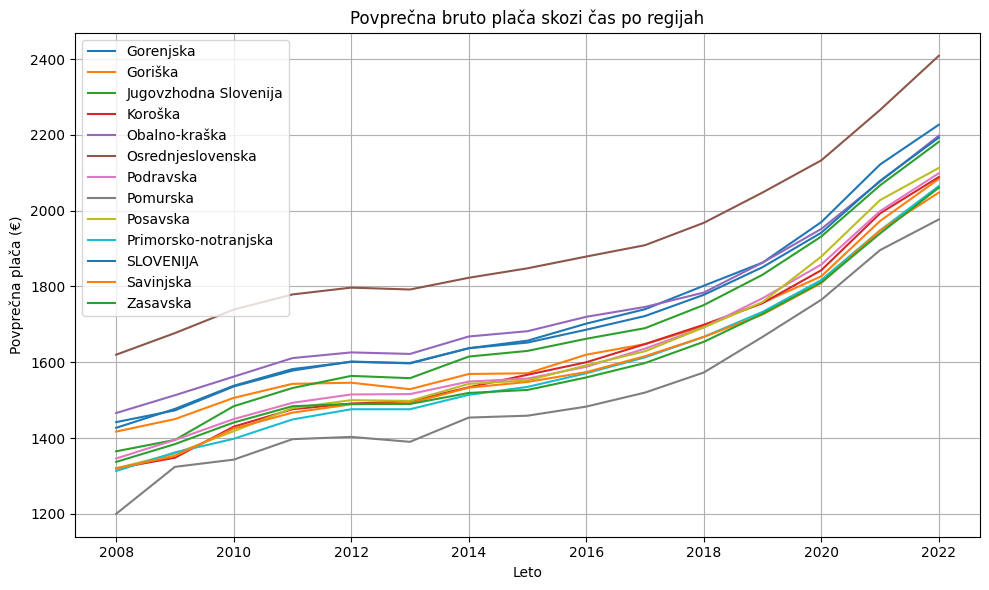

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Uvoz podatkov iz CSV datoteke
data_df = pd.read_csv("placa_utf8.csv")

# Preverimo prvih nekaj vrstic
print(data_df.head())

# Filtriramo samo relevantne stolpce
filtered_df = data_df[(data_df['STAROST'] == 'Starost - SKUPAJ') &
                       (data_df['SPOL'] == 'Spol - SKUPAJ') &
                        (data_df['PLAČA'] == 'Bruto') &
                       (data_df['MERITVE'] == 'Povprečje')]

# Preverimo, ali so v stolpcu "LETO" nenavadne vrednosti
print(filtered_df["LETO"].unique())

# Pretvorimo LETO v številke (če so v formatu, ki ni številka)
filtered_df.loc[:, "LETO"] = pd.to_numeric(filtered_df["LETO"], errors='coerce')

# Pretvorimo tudi "DATA" v število, če ni v pravilnem formatu
filtered_df.loc[:, "DATA"] = pd.to_numeric(filtered_df["DATA"], errors='coerce')

# Odstranimo vrstice, kjer je LETO ali DATA NaN
filtered_df = filtered_df.dropna(subset=["LETO", "DATA"])

# Sortiramo podatke po regiji in letu
filtered_df = filtered_df.sort_values(by=["STATISTIČNA REGIJA", "LETO"])

# Risanje grafa za bruto plače po regijah skozi čas
plt.figure(figsize=(10, 6))
for region in filtered_df["STATISTIČNA REGIJA"].unique():
    region_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == region]
    plt.plot(region_df["LETO"], region_df["DATA"], label=region)

plt.title("Povprečna bruto plača skozi čas po regijah")
plt.xlabel("Leto")
plt.ylabel("Povprečna plača (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Katera regija je imela največjo rast med 2008–2022

V tem delu smo za vsako regijo preverili vrednosti plač v začetni (2008) in končni (2022) letu. Če so podatki za obe leti na voljo, smo izračunali razliko med plačami, s čimer smo ugotovili, katera regija je imela največjo rast. Rezultat se nato izpiše, kar omogoča vpogled v medregionalne razlike v plačah.

In [3]:
growth = {}

for region in filtered_df["STATISTIČNA REGIJA"].unique():
    reg_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == region]
    reg_df = reg_df.sort_values(by="LETO")
    if not reg_df.empty and reg_df["LETO"].min() == 2008 and reg_df["LETO"].max() == 2022:
        start = reg_df[reg_df["LETO"] == 2008]["DATA"].values[0]
        end = reg_df[reg_df["LETO"] == 2022]["DATA"].values[0]
        growth[region] = end - start

# Najdi regijo z največjo rastjo
top_region = max(growth, key=growth.get)
print(f"Regija z največjo rastjo: {top_region} ({growth[top_region]:.2f} €)")


Regija z največjo rastjo: Jugovzhodna Slovenija (817.00 €)


# Povprečna plača po regiji za določeno leto

Na podlagi filtriranih podatkov za leto 2022 smo izdelali stolpični graf, ki prikazuje povprečno bruto plačo v posameznih regijah. Ta vizualizacija je uporabna za hitro primerjavo med regijami glede trenutnega stanja plač.

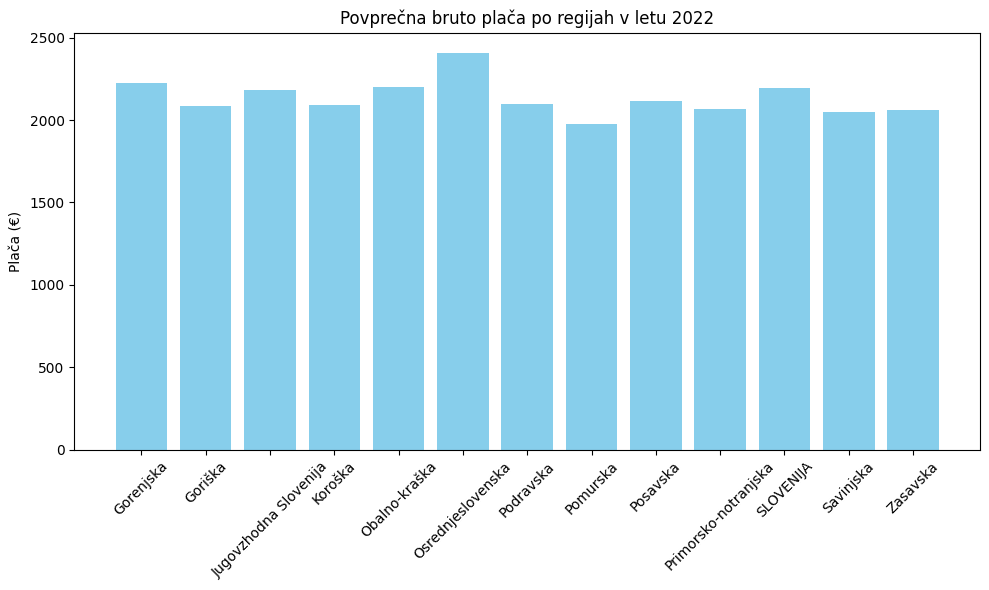

In [4]:
izbrano_leto = 2022
leto_df = filtered_df[filtered_df["LETO"] == izbrano_leto]

plt.figure(figsize=(10, 6))
plt.bar(leto_df["STATISTIČNA REGIJA"], leto_df["DATA"], color='skyblue')
plt.xticks(rotation=45)
plt.title(f"Povprečna bruto plača po regijah v letu {izbrano_leto}")
plt.ylabel("Plača (€)")
plt.tight_layout()
plt.show()


# Animacija

**Ustvarjanje animacije:**

S pomočjo knjižnice matplotlib.animation smo pripravili animacijo, ki ciklično prikazuje razvoj povprečnih plač po regijah skozi leta. Animacija posodablja graf za vsako leto posebej in omogoča bolj dinamičen pogled na spreminjanje plač skozi čas. Rezultat animacije shranimo tudi kot GIF datoteko.

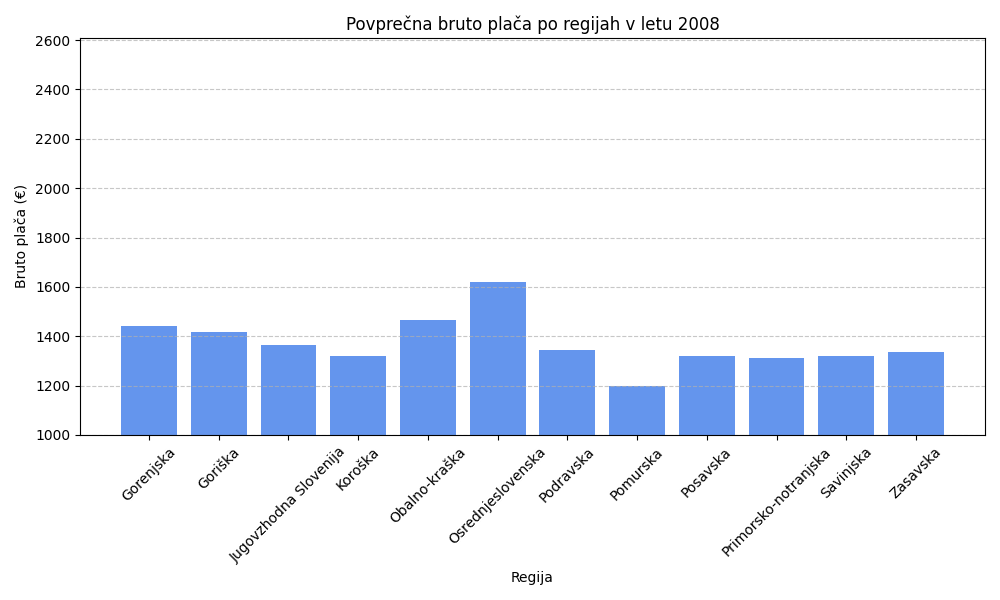

In [5]:
from IPython.display import Image
Image("placa_animacija.gif")

# Najvišja razlika med regijama 2008-2022

**Analiza najvišje razlike med regijami:**

Tukaj smo za vsako leto identificirali regijo z najvišjo in najnižjo plačo ter ustvarili pregled, kjer je navedeno, katera regija je bila na vrhu in katera na dnu. 

In [13]:
pregled = []

for leto in sorted(filtered_df["LETO"].unique()):
    leto_df = filtered_df[filtered_df["LETO"] == leto]
    
    if leto_df.empty:
        continue
    
    max_row = leto_df.loc[leto_df["DATA"].idxmax()]
    min_row = leto_df.loc[leto_df["DATA"].idxmin()]
    
    pregled.append({
        "LETO": leto,
        "NAJVIŠJA REGIJA": max_row["STATISTIČNA REGIJA"],
        "PLAČA MAX (€)": max_row["DATA"],
        "NAJNIŽJA REGIJA": min_row["STATISTIČNA REGIJA"],
        "PLAČA MIN (€)": min_row["DATA"]
    })

pregled_df = pd.DataFrame(pregled)

print(pregled_df)


    LETO    NAJVIŠJA REGIJA  PLAČA MAX (€) NAJNIŽJA REGIJA  PLAČA MIN (€)
0   2008  Osrednjeslovenska           1620        Pomurska           1200
1   2009  Osrednjeslovenska           1677        Pomurska           1324
2   2010  Osrednjeslovenska           1739        Pomurska           1343
3   2011  Osrednjeslovenska           1779        Pomurska           1397
4   2012  Osrednjeslovenska           1797        Pomurska           1403
5   2013  Osrednjeslovenska           1792        Pomurska           1390
6   2014  Osrednjeslovenska           1823        Pomurska           1454
7   2015  Osrednjeslovenska           1848        Pomurska           1459
8   2016  Osrednjeslovenska           1879        Pomurska           1483
9   2017  Osrednjeslovenska           1909        Pomurska           1520
10  2018  Osrednjeslovenska           1968        Pomurska           1573
11  2019  Osrednjeslovenska           2048        Pomurska           1667
12  2020  Osrednjeslovenska           

Zanimivo ostajata isti regiji skozi vsa leta - najvišjo povprečno bruto plačo ima vedno osrednjeslovenska regija, najslabše plačani pa so bili v Pomurski regiji.

**Izračun in vizualizacija razlike med Osrednjeslovensko in Pomursko regijo:**

Za podrobnejšo analizo smo združili podatke iz Osrednjeslovenske in Pomurske regije, nato pa izračunali razliko v plačah med obema regijama po letih. Rezultat smo vizualno prikazali s črtnim grafom, kar jasno pokaže, kako se medsebojna razlika spreminja skozi čas, pri čemer smo ugotovili, da je najvišja razlika znašala 432 € v letu 2022.

    LETO DATA_OS DATA_POM RAZLIKA
0   2008    1620     1200     420
1   2009    1677     1324     353
2   2010    1739     1343     396
3   2011    1779     1397     382
4   2012    1797     1403     394
5   2013    1792     1390     402
6   2014    1823     1454     369
7   2015    1848     1459     389
8   2016    1879     1483     396
9   2017    1909     1520     389
10  2018    1968     1573     395
11  2019    2048     1667     381
12  2020    2133     1765     368
13  2021    2266     1896     370
14  2022    2409     1977     432


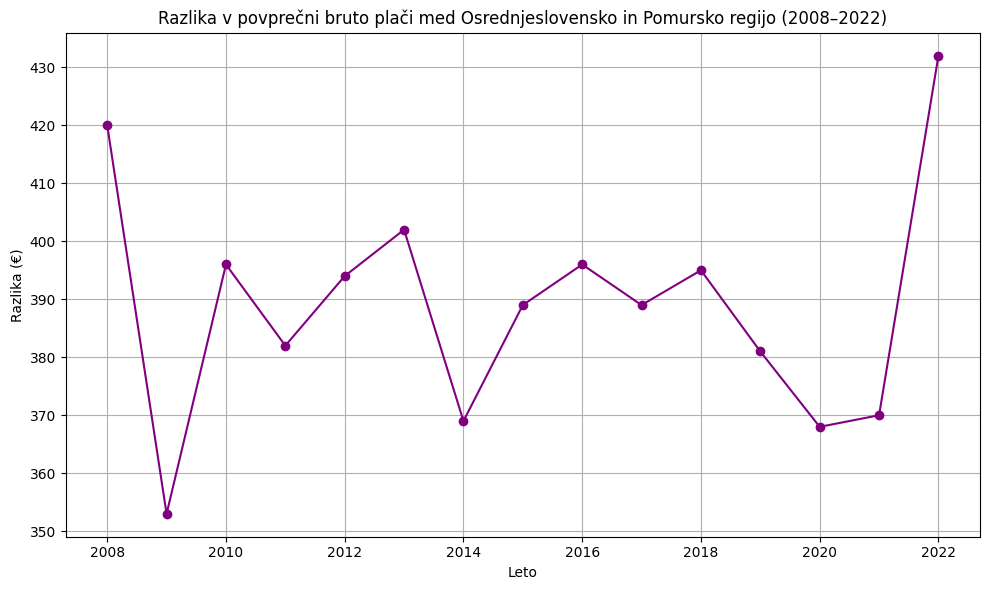

In [14]:
os_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == "Osrednjeslovenska"]
pom_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == "Pomurska"]

merged_df = pd.merge(os_df[["LETO", "DATA"]], pom_df[["LETO", "DATA"]], on="LETO", suffixes=("_OS", "_POM"))
merged_df["RAZLIKA"] = merged_df["DATA_OS"] - merged_df["DATA_POM"]

print(merged_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_df["LETO"], merged_df["RAZLIKA"], marker='o', color='purple')
plt.title("Razlika v povprečni bruto plači med Osrednjeslovensko in Pomursko regijo (2008–2022)")
plt.xlabel("Leto")
plt.ylabel("Razlika (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


Ker smo v prejšnji točki ugotovili da sta skozi leta 2008-2022 konstantno bili isti regiji na obeh ekstremih, smo v tej točki prikazali razlike med Osrednjeslovensko in Pomursko regijo. Te predstavljajo največjo razliko med povprečnimi plačami med katerimakoli regijama v tem časovnem obdobju. Vidimo, da se je najvišja razlika zgodila ravno leta 2022, ko je znašala 432€.

# Razlika med spoloma 2022

**Analiza spolne razlike v 2022:**

Na zadnjem delu smo se osredotočili na razlike med spoloma za leto 2022. Podatke smo filtrirali za "Bruto" plače, meritev "Povprečje" in ustrezne starostne skupine. S pomočjo pivot_table smo podatke preuredili tako, da smo dobili ločene stolpce za moške in ženske, nato pa izračunali absolutno in odstotno razliko med njima. Rezultate smo prikazali v obliki tabele in vizualizirali s stolpičnim grafom, kar je pomagalo razkriti, v kateri regiji je bila razlika med spoloma največja oziroma najmanjša.

       STATISTIČNA REGIJA   Moški  Ženske  RAZLIKA_SPOLI (€)  RAZLIKA (%)
0           Obalno-kraška  2292.0  2082.0              210.0         10.1
1               Gorenjska  2315.0  2118.0              197.0          9.3
2                Posavska  2193.0  2008.0              185.0          9.2
3                 Koroška  2166.0  1989.0              177.0          8.9
4                Pomurska  2050.0  1888.0              162.0          8.6
5               Podravska  2168.0  2013.0              155.0          7.7
6    Primorsko-notranjska  2131.0  1976.0              155.0          7.8
7               Savinjska  2112.0  1966.0              146.0          7.4
8                 Goriška  2147.0  2004.0              143.0          7.1
9               SLOVENIJA  2255.0  2117.0              138.0          6.5
10               Zasavska  2116.0  1996.0              120.0          6.0
11      Osrednjeslovenska  2457.0  2353.0              104.0          4.4
12  Jugovzhodna Slovenija  2218.0  213

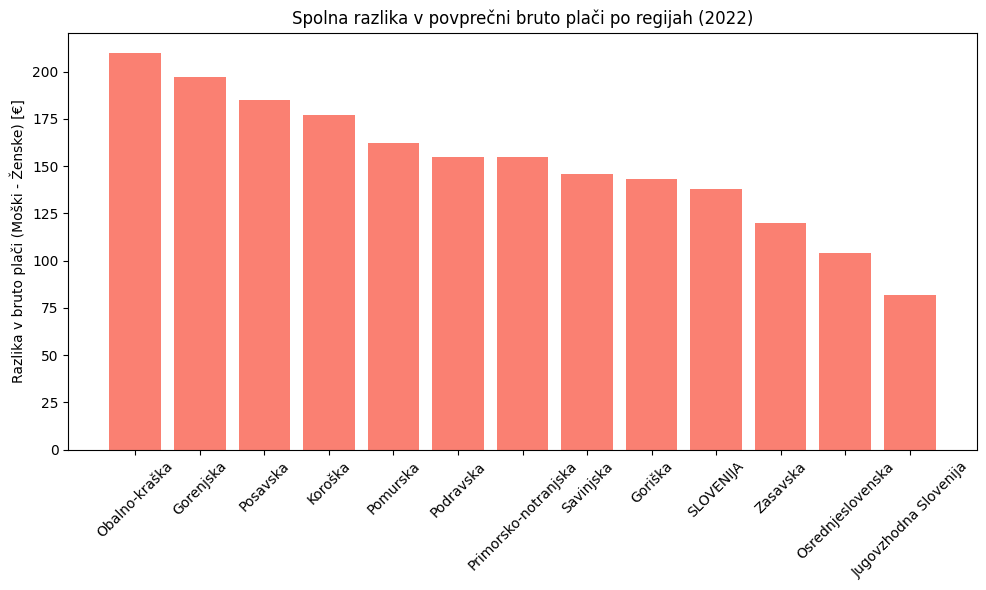

In [25]:
spol_2022_df = data_df[
    (data_df["LETO"] == 2022) &
    (data_df["PLAČA"] == "Bruto") &
    (data_df["MERITVE"] == "Povprečje") &
    (data_df["SPOL"].isin(["Moški", "Ženske"])) &
    (data_df["STAROST"] == "Starost - SKUPAJ")
].copy()

spol_2022_df["DATA"] = pd.to_numeric(spol_2022_df["DATA"], errors="coerce")

pivot_2022 = spol_2022_df.pivot_table(
    index="STATISTIČNA REGIJA",
    columns="SPOL",
    values="DATA"
).reset_index()

pivot_2022.columns.name = None

pivot_2022["RAZLIKA_SPOLI (€)"] = pivot_2022["Moški"] - pivot_2022["Ženske"]
pivot_2022["RAZLIKA (%)"] = ((pivot_2022["Moški"] - pivot_2022["Ženske"]) / pivot_2022["Ženske"]) * 100
pivot_2022["RAZLIKA (%)"] = pivot_2022["RAZLIKA (%)"].round(1)

pivot_2022 = pivot_2022.sort_values(by="RAZLIKA_SPOLI (€)", ascending=False)

print(pivot_2022.reset_index(drop=True)[["STATISTIČNA REGIJA", "Moški", "Ženske", "RAZLIKA_SPOLI (€)", "RAZLIKA (%)"]])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(pivot_2022["STATISTIČNA REGIJA"], pivot_2022["RAZLIKA_SPOLI (€)"], color='salmon')
plt.xticks(rotation=45)
plt.ylabel("Razlika v bruto plači (Moški - Ženske) [€]")
plt.title("Spolna razlika v povprečni bruto plači po regijah (2022)")
plt.tight_layout()
plt.show()


Evidentno je, da je bila leta 2022 največja razlika med spoloma v Obalno-Kraški regiji, najmanjša pa v Jugovzhodni regiji, ki je zanimivo hkrati tudi regija z največjo rastjo bruto plač med letoma 2008 in 2022, kot smo ugotovili v eni od prejšnjih točk.